<a href="https://colab.research.google.com/github/Lolo-17/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

# Part 1 - Setting the Stage

**1) Load the dataset**

In [105]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [106]:
# Loading the data set and saving it to df variable
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
df = pd.read_csv('bootcampers.csv')
print(df.shape)
df.head()

--2020-08-12 22:28:17--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv.1’

bootcampers.csv.1   100%[===================>]   2.38M  10.3MB/s    in 0.2s    

2020-08-12 22:28:18 (10.3 MB/s) - ‘bootcampers.csv.1’ saved [2499384/2499384]

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [107]:
# dataset sample size of 20
df20 = df.sample(20, random_state=42)

In [108]:
# dataset sample size of 200
df200 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [109]:
# Population mean
df['ConvertedSalary'].mean()

73453.40420137631

In [110]:
# Sample size of 20 mean
df20['ConvertedSalary'].mean()

55752.2

In [111]:
# Sample size of 200 mean
df200['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the sample mean for a size of 200. One reason is because the sample mean is in between the lower sample size and population mean which indicates it is more accurate. Also, if the sample size increases then the estimate of the mean is more precise.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

In [112]:
# Checking standard error values
print(df['ConvertedSalary'].std() / np.sqrt(2761))
print(df20['ConvertedSalary'].std() / np.sqrt(20))
print(df200['ConvertedSalary'].std() / np.sqrt(200))

1098.3007540669432
9530.275995506441
4035.6853799484325


The lower the sample size then the higher the standard error will be. If the

sample size is larger then the sample error will be smaller.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We need to use a larger sample size from the population to minimize the

standard error. Also, we need to elaborate our confidence level and

accuracy.

# Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



### Building a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=200>

In [171]:
# Function that calculates the confidence interval. See above formula ^
# This function returns lower and upper bounds, mean, moe and std error
def confidence_interval(sample, confidence_level=.95):
  sample = np.array(sample)
  x_bar = np.mean(sample)
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)

  std_err = s / np.sqrt(n)

  moe = t * std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

  # return print(
  #              ' Lower Bound:', lower_bound, '\n',
  #              'Mean:', x_bar, '\n',
  #              'Upper Bound:', upper_bound, '\n',
  #              'Margin of Error:', moe, '\n',
  #              'Standard Error:', std_err
  #              )

In [172]:
# Getting the confidence interval for sample size of 20
BCI1 = df20['ConvertedSalary']

CI1 = confidence_interval(BCI1)

CI1

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [173]:
# Getting the confidence interval for sample size of 200
BCI2 = df200['ConvertedSalary']

CI2 = confidence_interval(BCI2)

CI2

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size, the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distribution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [163]:
# This function only returns mean and margin of error
def confidence_interval1(sample, confidence_level=.95):
  sample = np.array(sample)
  x_bar = np.mean(sample)
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)

  std_err = s / np.sqrt(n)

  moe = t * std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return print(
               ' Mean:', x_bar, '\n',
               'Margin of Error:', moe
               )

In [164]:
# Showing the value of mean and margin of error for sample size 20
BCI1 = df20['ConvertedSalary']

CI1 = confidence_interval1(BCI1)

CI1

 Mean: 55752.2 
 Margin of Error: 19947.096903744638


In [165]:
# This shows how far off the margins are from the mean using a sample of 20
print(
      ' +', 55752.2 + 19947.096903744638, '\n',
      '-', 55752.2 - 19947.096903744638
     )


 + 75699.29690374463 
 - 35805.10309625536


In [166]:
# Showing the value of mean and margin of error for sample size 200
BCI2 = df200['ConvertedSalary']

CI2 = confidence_interval1(BCI2)

CI2

 Mean: 68551.255 
 Margin of Error: 7958.196195520917


In [167]:
# This shows how far off the margins are from the mean using a sample of 200
print(
      ' +', 68551.255 + 7958.196195520917, '\n',
      '-',  68551.255 - 7958.196195520917
     )

 + 76509.45119552092 
 - 60593.058804479086


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

# Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

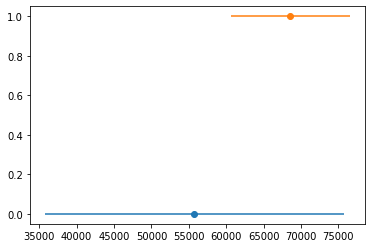

In [193]:
# Sample size of 20
# Blue line
plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')

# Sample size of 200
# Yellow line
plt.errorbar(x=CI2[1], y=1, xerr=CI2[3], fmt='o')

plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

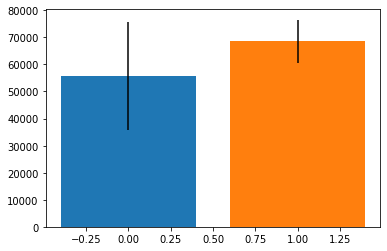

In [194]:
# Sample size of 20
# Blue line
plt.bar(x=0, height=CI1[1], yerr=CI1[3])

# Sample size of 200
# Yellow line
plt.bar(x=1, height=CI2[1], yerr=CI2[3])

plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [179]:
# Getting the confidence intervals from population
BCI3 = df['ConvertedSalary']

CI3 = confidence_interval(BCI3)

CI3

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

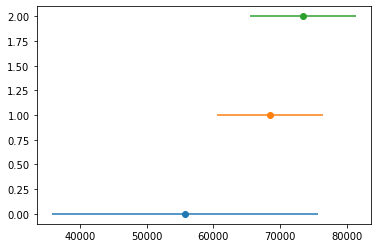

In [192]:
# Sample size of 20
# Blue line
plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')

# Sample size of 200
# Yellow line
plt.errorbar(x=CI2[1], y=1, xerr=CI2[3], fmt='o')

# Population
# Green line
plt.errorbar(x=CI3[1], y=2, xerr=CI2[3], fmt='o')

plt.show()

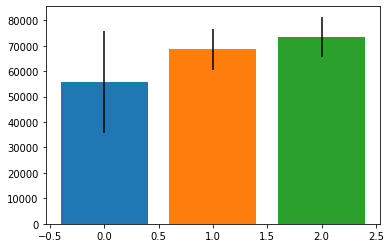

In [191]:
# Sample size of 20
# Blue line
plt.bar(x=0, height=CI1[1], yerr=CI1[3])

# Sample size of 200
# Yellow line
plt.bar(x=1, height=CI2[1], yerr=CI2[3])

# Population
# Green line
plt.bar(x=2, height=CI3[1], yerr=CI2[3])

plt.show()

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is how tightly grouped the estimates are or not. For example,

if the estimates are tightly grouped then the precision is high and vice versa.

The different between precision and accuracy is how far or close the estimates

are and if the estimates are tightly grouped or not. For instances, a low 

accuracy is when the estimates are far apart from the population data.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

The correct interpretation is just that 95% level of confidence is based on the 

random samples conducted and will contain the true population.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.